# SAE Training Loss Visualization

This notebook visualizes training dynamics for the Gated Sparse Autoencoder (gSAE).

**Purpose:**
- Monitor training progress and convergence
- Compare loss components (reconstruction, sparsity)
- Verify target sparsity is achieved
- Identify training issues or anomalies

**Input Data:**
- Training logs: CSV with step, total_loss, recon_loss, sparsity_loss, sparsity_l0

**Output:**
- Multi-panel loss curves
- Sparsity evolution
- Training statistics

In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_ROOT = Path(os.getcwd()).parent.parent
sys.path.append(str(PROJECT_ROOT))

from src.visualization import (
    setup_korean_font,
    load_training_logs,
    plot_training_loss
)

print(f"Project root: {PROJECT_ROOT}")

/home/youngjins/miniconda3/envs/belief_llm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Project root: /home/youngjins/project/global_ai_frontier


In [2]:
# Setup
setup_korean_font()
sns.set_style('whitegrid')

Font configured: ['Noto Sans CJK KR']


In [3]:
# Configuration
RESULTS_DIR = PROJECT_ROOT / "results"
ASSETS_DIR = PROJECT_ROOT / "notebooks" / "visualizations" / "assets"
ASSETS_DIR.mkdir(exist_ok=True, parents=True)

# Stage: 'pilot', 'medium', or 'full'
STAGE = "pilot"

# SAE configuration
SAE_TYPE = "gated"  # 'standard' or 'gated'
LAYER_QUANTILE = "q2"  # 'q1', 'q2', or 'q3'

print(f"Stage: {STAGE}")
print(f"SAE type: {SAE_TYPE}")
print(f"Layer quantile: {LAYER_QUANTILE}")
print(f"Model path: results/models/sae-{SAE_TYPE}_{STAGE}_{LAYER_QUANTILE}/")

Stage: pilot
SAE type: gated
Layer quantile: q2
Model path: results/models/sae-gated_pilot_q2/


## Load Training Logs

In [4]:
# Load logs (from results/models/sae-{type}_{stage}_{layer}/)
logs = load_training_logs(
    RESULTS_DIR, 
    stage=STAGE,
    sae_type=SAE_TYPE,
    layer_quantile=LAYER_QUANTILE
)

print(f"Training logs shape: {logs.shape}")
print(f"Total steps: {len(logs)}")
print(f"\nColumns: {list(logs.columns)}")
print(f"\nFirst few rows:")
print(logs.head())

Training logs shape: (100, 10)
Total steps: 100

Columns: ['step', 'total_loss', 'recon_loss', 'aux_loss', 'sparsity_loss', 'lp_loss', 'sparsity_l0', 'p', 'sparsity_coeff', 'lr']

First few rows:
   step  total_loss  recon_loss    aux_loss  sparsity_loss      lp_loss  \
0     0  585.559387  184.175934  184.175934     217.207520  2172.075195   
1   100  113.485962    5.107481    5.221241     103.157242  1031.572388   
2   200   23.430294    1.870557    2.191707      19.368029   193.680283   
3   300    9.348876    1.015848    1.487189       6.845839    68.458389   
4   400    6.774727    0.658021    1.121374       4.995332    49.953316   

   sparsity_l0    p  sparsity_coeff            lr  
0     0.499909  1.0             0.1  1.000000e-07  
1     0.325412  1.0             0.1  1.010000e-05  
2     0.095535  1.0             0.1  2.010000e-05  
3     0.024520  1.0             0.1  3.010000e-05  
4     0.009010  1.0             0.1  4.010000e-05  


## Plot Training Loss Curves

/home/youngjins/project/global_ai_frontier/src/visualization/plotting_utils.py:403: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/youngjins/project/global_ai_frontier/src/visualization/plotting_utils.py:403: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/youngjins/project/global_ai_frontier/src/visualization/plotting_utils.py:403: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/youngjins/project/global_ai_frontier/src/visualization/plotting_utils.py:403: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/youngjins/project/global_ai_frontier/src/visualization/plotting_utils.py:403: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/youngjins/project/global_ai_frontier/src/vi

Saved to /home/youngjins/project/global_ai_frontier/notebooks/visualizations/assets/sae_training_loss_pilot.png


/home/youngjins/miniconda3/envs/belief_llm/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/youngjins/miniconda3/envs/belief_llm/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/youngjins/miniconda3/envs/belief_llm/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/youngjins/miniconda3/envs/belief_llm/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/youngjins/miniconda3/envs/belief_llm/lib/python3.11/site-packages/IPy

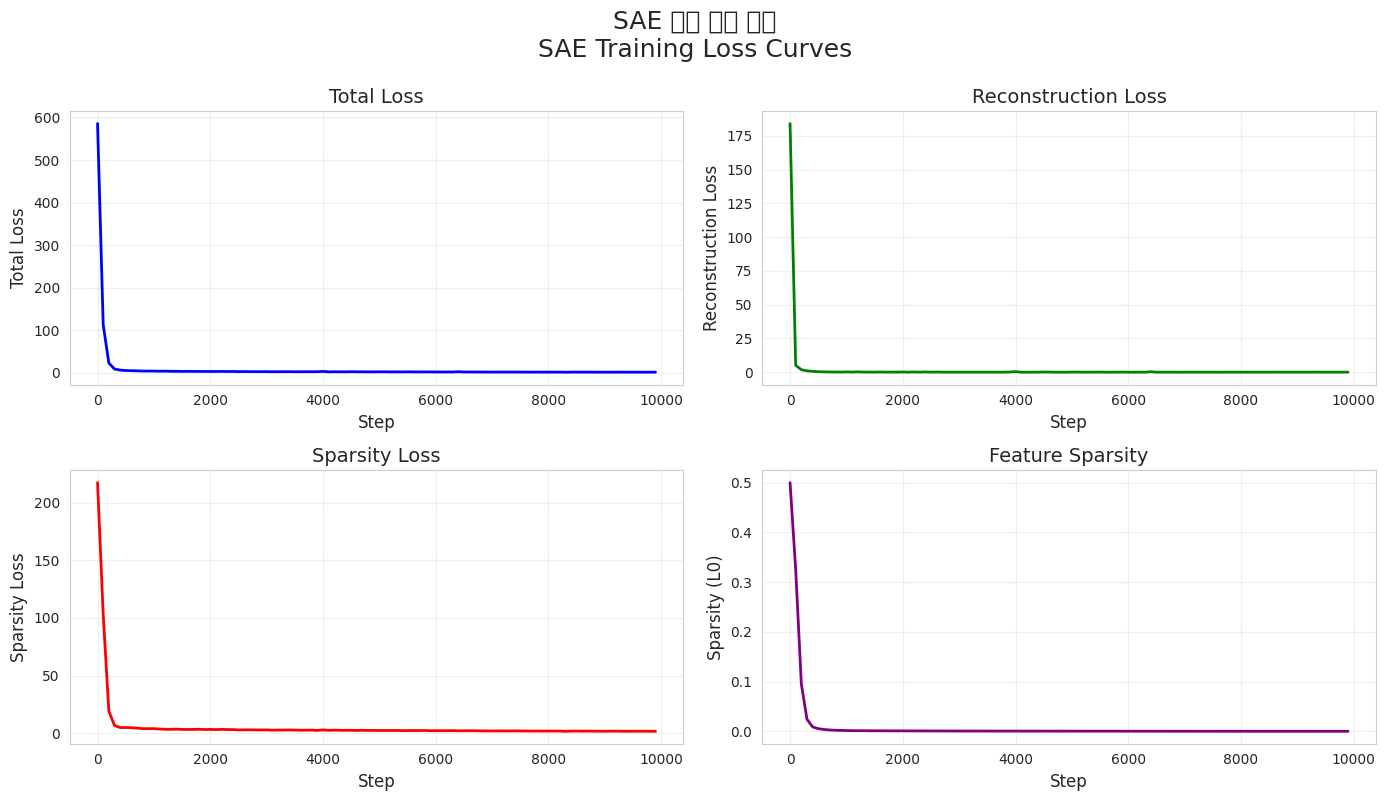

In [5]:
fig = plot_training_loss(
    training_logs=logs,
    save_path=ASSETS_DIR / f"sae_training_loss_{STAGE}.png",
    figsize=(14, 8)
)

plt.show()

## Detailed Loss Analysis

/tmp/ipykernel_27706/3975252675.py:31: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/3975252675.py:31: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/3975252675.py:31: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/3975252675.py:31: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/3975252675.py:31: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/3975252675.py:31: UserWarning: Glyph 54876 (\N{HANGUL SYLLABLE HWAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/3975252675.py:31: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  

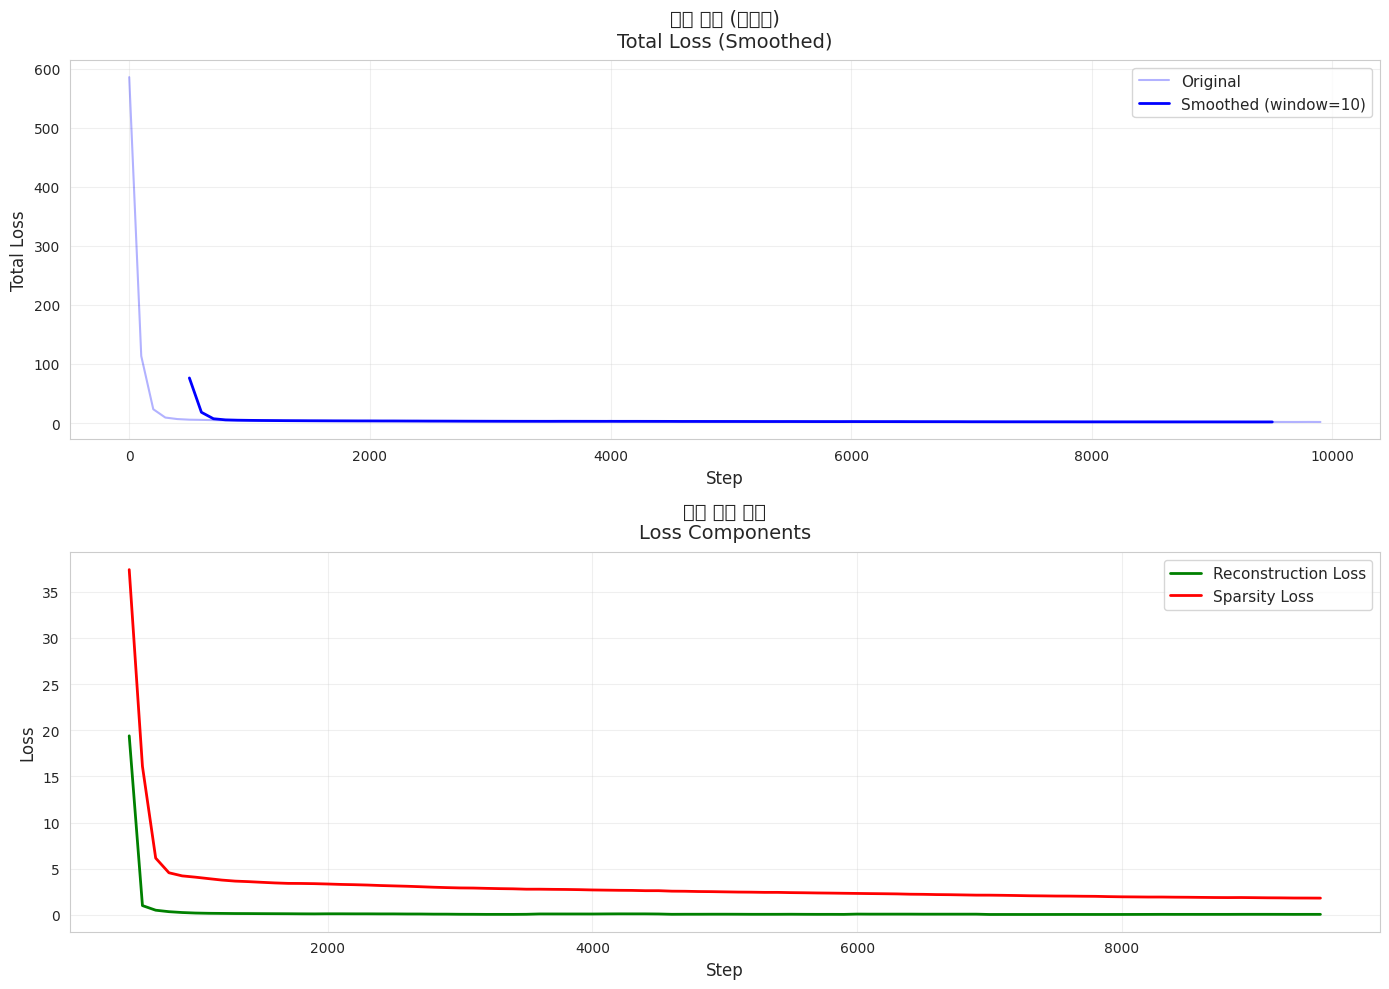

In [6]:
# Smoothed curves
window = min(50, len(logs) // 10)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Total loss (original + smoothed)
ax = axes[0]
ax.plot(logs['step'], logs['total_loss'], alpha=0.3, color='blue', label='Original')
ax.plot(logs['step'], logs['total_loss'].rolling(window=window, center=True).mean(),
        linewidth=2, color='blue', label=f'Smoothed (window={window})')
ax.set_xlabel('Step', fontsize=12)
ax.set_ylabel('Total Loss', fontsize=12)
ax.set_title('전체 손실 (평활화)\nTotal Loss (Smoothed)', fontsize=14, pad=10)
ax.legend(fontsize=11)
ax.grid(alpha=0.3)

# Loss components
ax = axes[1]
if 'recon_loss' in logs.columns:
    ax.plot(logs['step'], logs['recon_loss'].rolling(window=window, center=True).mean(),
            linewidth=2, color='green', label='Reconstruction Loss')
if 'sparsity_loss' in logs.columns:
    ax.plot(logs['step'], logs['sparsity_loss'].rolling(window=window, center=True).mean(),
            linewidth=2, color='red', label='Sparsity Loss')
ax.set_xlabel('Step', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_title('손실 구성 요소\nLoss Components', fontsize=14, pad=10)
ax.legend(fontsize=11)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(ASSETS_DIR / f"sae_training_detailed_{STAGE}.png", dpi=300, bbox_inches='tight')
plt.show()

## Sparsity Evolution

/tmp/ipykernel_27706/2932588474.py:26: UserWarning: Glyph 55148 (\N{HANGUL SYLLABLE HYI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/2932588474.py:26: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/2932588474.py:26: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/2932588474.py:26: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/2932588474.py:26: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/2932588474.py:26: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/2932588474.py:26: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  plt.

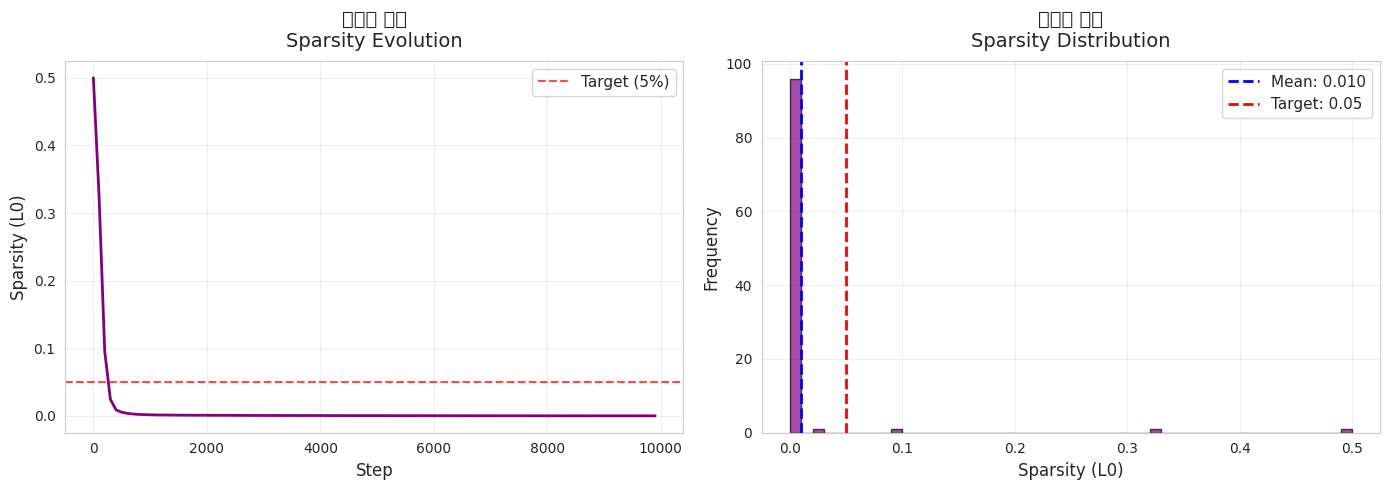


Sparsity Statistics:
  Final sparsity: 0.0002
  Mean sparsity:  0.0102
  Target:         0.0500
  Deviation:      0.0498


In [7]:
if 'sparsity_l0' in logs.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Sparsity over time
    ax = axes[0]
    ax.plot(logs['step'], logs['sparsity_l0'], linewidth=2, color='purple')
    ax.axhline(0.05, color='red', linestyle='--', label='Target (5%)', alpha=0.7)
    ax.set_xlabel('Step', fontsize=12)
    ax.set_ylabel('Sparsity (L0)', fontsize=12)
    ax.set_title('희소성 진화\nSparsity Evolution', fontsize=14, pad=10)
    ax.legend(fontsize=11)
    ax.grid(alpha=0.3)
    
    # Distribution of sparsity
    ax = axes[1]
    ax.hist(logs['sparsity_l0'], bins=50, color='purple', alpha=0.7, edgecolor='black')
    ax.axvline(logs['sparsity_l0'].mean(), color='blue', linestyle='--', 
               linewidth=2, label=f"Mean: {logs['sparsity_l0'].mean():.3f}")
    ax.axvline(0.05, color='red', linestyle='--', linewidth=2, label='Target: 0.05')
    ax.set_xlabel('Sparsity (L0)', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.set_title('희소성 분포\nSparsity Distribution', fontsize=14, pad=10)
    ax.legend(fontsize=11)
    ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(ASSETS_DIR / f"sae_sparsity_analysis_{STAGE}.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nSparsity Statistics:")
    print(f"  Final sparsity: {logs['sparsity_l0'].iloc[-1]:.4f}")
    print(f"  Mean sparsity:  {logs['sparsity_l0'].mean():.4f}")
    print(f"  Target:         0.0500")
    print(f"  Deviation:      {abs(logs['sparsity_l0'].iloc[-1] - 0.05):.4f}")

## Training Statistics

In [8]:
# Compute statistics
stats = {}

for col in ['total_loss', 'recon_loss', 'sparsity_loss', 'sparsity_l0']:
    if col in logs.columns:
        stats[col] = {
            'Initial': logs[col].iloc[0],
            'Final': logs[col].iloc[-1],
            'Min': logs[col].min(),
            'Max': logs[col].max(),
            'Mean': logs[col].mean(),
            'Std': logs[col].std(),
            'Change': logs[col].iloc[-1] - logs[col].iloc[0],
            'Change (%)': (logs[col].iloc[-1] - logs[col].iloc[0]) / logs[col].iloc[0] * 100
        }

df_stats = pd.DataFrame(stats).T

print("\nTraining Statistics:")
print("=" * 100)
print(df_stats.to_string())

# Save to CSV
df_stats.to_csv(ASSETS_DIR / f"training_statistics_{STAGE}.csv")
print(f"\nSaved to {ASSETS_DIR / f'training_statistics_{STAGE}.csv'}")


Training Statistics:
                  Initial     Final       Min         Max       Mean        Std      Change  Change (%)
total_loss     585.559387  1.856416  1.850581  585.559387  10.052456  59.216275 -583.702971  -99.682967
recon_loss     184.175934  0.041516  0.022128  184.175934   2.001954  18.409529 -184.134418  -99.977458
sparsity_loss  217.207520  1.769608  1.749107  217.207520   5.981148  23.651010 -215.437912  -99.185292
sparsity_l0      0.499909  0.000188  0.000188    0.499909   0.010186   0.059910   -0.499721  -99.962368

Saved to /home/youngjins/project/global_ai_frontier/notebooks/visualizations/assets/training_statistics_pilot.csv


## Convergence Analysis

In [9]:
# Check convergence based on recent stability
window_size = min(100, len(logs) // 5)
recent_window = logs.tail(window_size)

print(f"\nConvergence Analysis (last {window_size} steps):")
print("=" * 80)

for col in ['total_loss', 'recon_loss', 'sparsity_loss']:
    if col in logs.columns:
        mean = recent_window[col].mean()
        std = recent_window[col].std()
        cv = (std / mean) * 100  # Coefficient of variation
        
        converged = cv < 5.0  # <5% variation = converged
        status = "✓ Converged" if converged else "⚠ Not converged"
        
        print(f"{col:20s}: Mean={mean:.4f}, Std={std:.4f}, CV={cv:.2f}% {status}")

# Sparsity convergence
if 'sparsity_l0' in logs.columns:
    final_sparsity = logs['sparsity_l0'].iloc[-1]
    target_sparsity = 0.05
    deviation = abs(final_sparsity - target_sparsity)
    
    within_target = deviation < 0.01  # Within 1% of target
    status = "✓ Target achieved" if within_target else "⚠ Target not achieved"
    
    print(f"\nSparsity Target:")
    print(f"  Final:  {final_sparsity:.4f}")
    print(f"  Target: {target_sparsity:.4f}")
    print(f"  Status: {status}")


Convergence Analysis (last 20 steps):
total_loss          : Mean=1.9593, Std=0.0808, CV=4.13% ✓ Converged
recon_loss          : Mean=0.0480, Std=0.0153, CV=31.87% ⚠ Not converged
sparsity_loss       : Mean=1.8550, Std=0.0717, CV=3.87% ✓ Converged

Sparsity Target:
  Final:  0.0002
  Target: 0.0500
  Status: ⚠ Target not achieved


## Loss Rate Analysis

/tmp/ipykernel_27706/3948341838.py:16: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/3948341838.py:16: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/3948341838.py:16: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/3948341838.py:16: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/3948341838.py:16: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_27706/3948341838.py:17: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from font(s) DejaVu Sans.
  plt.savefig(ASSETS_DIR / f"loss_gradient_{STAGE}.png", dpi=300, bbox_inches='tight')
/tmp/ipykernel_27706/3948341838.py:17: UserWarning: Glyph 4989

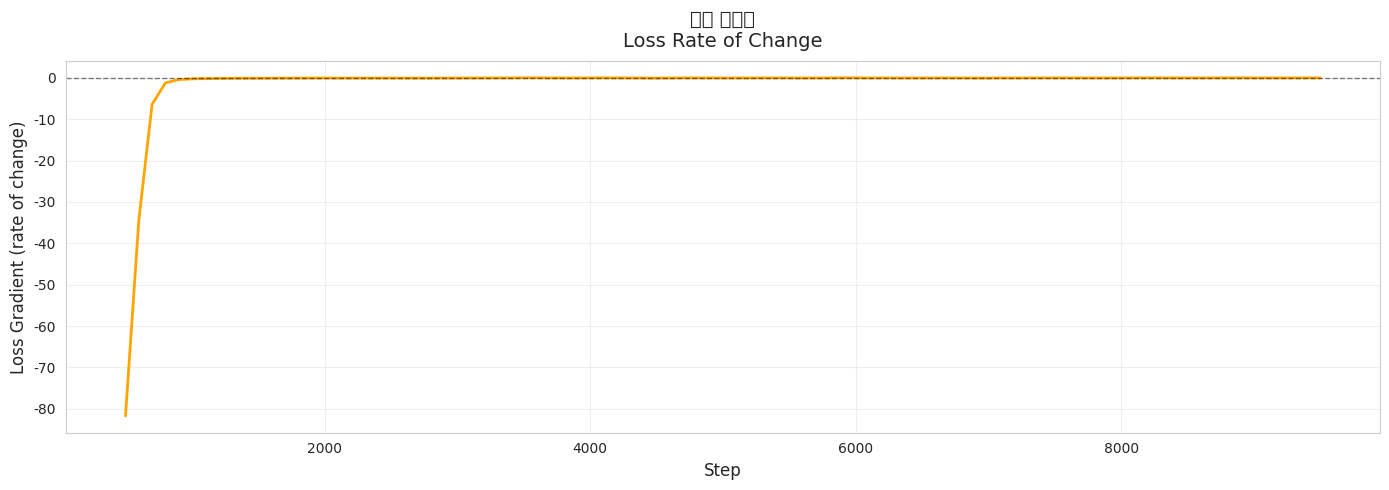


Loss Gradient Statistics:
  Mean:   -8.197789
  Median: -0.031746
  Std:    54.581655


In [10]:
# Compute loss gradient (rate of change)
if len(logs) > 1:
    fig, ax = plt.subplots(figsize=(14, 5))
    
    # Compute gradient
    gradient = np.gradient(logs['total_loss'].values)
    smoothed_gradient = pd.Series(gradient).rolling(window=window, center=True).mean()
    
    ax.plot(logs['step'], smoothed_gradient, linewidth=2, color='orange')
    ax.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
    ax.set_xlabel('Step', fontsize=12)
    ax.set_ylabel('Loss Gradient (rate of change)', fontsize=12)
    ax.set_title('손실 변화율\nLoss Rate of Change', fontsize=14, pad=10)
    ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(ASSETS_DIR / f"loss_gradient_{STAGE}.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nLoss Gradient Statistics:")
    print(f"  Mean:   {np.mean(gradient):.6f}")
    print(f"  Median: {np.median(gradient):.6f}")
    print(f"  Std:    {np.std(gradient):.6f}")

## Interpretation

### What to Look For:

1. **Total Loss:**
   - Should decrease monotonically
   - Converge to stable minimum
   - No sudden spikes or divergence

2. **Reconstruction Loss:**
   - Measures how well SAE reconstructs inputs
   - Should stabilize at low value
   - Balance with sparsity constraint

3. **Sparsity Loss:**
   - Encourages sparse activations
   - Should decrease as model learns sparsity
   - Target: <5% active features (L0 norm)

4. **Sparsity (L0):**
   - Should converge to ~0.05 (5% active)
   - Too high: Features not sparse enough
   - Too low: May lose reconstruction quality

### Training Quality Indicators:

- ✓ **Good:** Smooth decrease, stable convergence, sparsity on target
- ⚠ **Warning:** High variance, slow convergence, sparsity off target
- ✗ **Bad:** Loss increase, divergence, training instability

### Next Steps:

1. If not converged: Continue training or adjust hyperparameters
2. If sparsity off: Adjust sparsity coefficient
3. If reconstruction poor: Reduce sparsity constraint
4. If training good: Proceed to IG² computation and bias analysis